In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_data = pd.read_csv('Churn.csv')
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bank_data.shape

(10000, 14)

In [4]:
bank_data.drop('RowNumber', axis = 1,inplace = True) #'CustomerId'
bank_data.drop('CustomerId', axis = 1,inplace = True)

In [5]:
bank_data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [11]:
bank_data.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
def print_col_dtype_values(df):
    for column in df:
        if(df[column].dtypes == 'object'):
            print(f'{column} : {df[column].unique()}')

In [16]:
print_col_dtype_values(bank_data)

Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [19]:
print(len(bank_data['Surname'].unique()))

2932


In [24]:
# pip install category_encoders

In [23]:
import category_encoders as ce

#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['Surname'], return_df=True, base=8)

In [38]:
#Fit and Transform Data
data_encoded=encoder.fit_transform(bank_data)
# data_encoded.iloc[2000:2030, :]
data_encoded.head()

,Surname_0,Surname_1,Surname_2,Surname_3,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,0,0,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,0,0,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
#encode the data
bank_data_encoded=pd.get_dummies(data_encoded[['Geography','Gender']],drop_first=True)
bank_data_encoded.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [44]:
bank_data = pd.concat([data_encoded, bank_data_encoded], axis = 1)

In [45]:
bank_data.head()

,Surname_0,Surname_1,Surname_2,Surname_3,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,0,0,0,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,0,0,0,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,0,0,0,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,0,0,0,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [46]:
bank_data.drop('Gender', axis = 1,inplace = True) #'CustomerId'
bank_data.drop('Geography', axis = 1,inplace = True)

In [47]:
bank_data.head()

,Surname_0,Surname_1,Surname_2,Surname_3,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,0,0,0,2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,0,0,0,3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,0,0,0,4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,0,0,0,5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [49]:
cols_to_scale = ['Surname_0','Surname_1','Surname_2', 'Surname_3', 'CreditScore', 'Age', 'Tenure', 'Balance',
                 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

bank_data[cols_to_scale] = scaler.fit_transform(bank_data[cols_to_scale])

bank_data.head()

,Surname_0,Surname_1,Surname_2,Surname_3,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.0,0.0,0.0,0.142857,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0
1,0.0,0.0,0.0,0.285714,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.0,0.0,0.0,0.428571,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0
3,0.0,0.0,0.0,0.571429,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,0.0,0.0,0.0,0.714286,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0


In [50]:
bank_data.dtypes

Surname_0            float64
Surname_1            float64
Surname_2            float64
Surname_3            float64
CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

In [51]:
bank_data.shape

(10000, 16)

In [57]:
bank_data_train = bank_data.drop('Exited', axis = 1)
label = bank_data['Exited']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(bank_data_train, label, test_size=0.3)

In [52]:
import tensorflow as tf

In [109]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (15,), activation = 'relu'),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 150)

Epoch 1/150
219/219 [==============================] - 0s 670us/step - loss: 0.5320 - accuracy: 0.7913
Epoch 2/150
219/219 [==============================] - 0s 695us/step - loss: 0.4748 - accuracy: 0.7993
Epoch 3/150
219/219 [==============================] - 0s 693us/step - loss: 0.4604 - accuracy: 0.8030
Epoch 4/150
219/219 [==============================] - 0s 722us/step - loss: 0.4517 - accuracy: 0.8053
Epoch 5/150
219/219 [==============================] - 0s 689us/step - loss: 0.4444 - accuracy: 0.8069
Epoch 6/150
219/219 [==============================] - 0s 689us/step - loss: 0.4391 - accuracy: 0.8091
Epoch 7/150
219/219 [==============================] - 0s 691us/step - loss: 0.4360 - accuracy: 0.8146
Epoch 8/150
219/219 [==============================] - 0s 687us/step - loss: 0.4315 - accuracy: 0.8163
Epoch 9/150
219/219 [==============================] - 0s 696us/step - loss: 0.4281 - accuracy: 0.8154
Epoch 10/150
219/219 [==============================] - 0s 691us/step - l

219/219 [==============================] - 0s 701us/step - loss: 0.3374 - accuracy: 0.8623
Epoch 80/150
219/219 [==============================] - 0s 690us/step - loss: 0.3380 - accuracy: 0.8657
Epoch 81/150
219/219 [==============================] - 0s 696us/step - loss: 0.3372 - accuracy: 0.8650
Epoch 82/150
219/219 [==============================] - 0s 688us/step - loss: 0.3385 - accuracy: 0.8621
Epoch 83/150
219/219 [==============================] - 0s 688us/step - loss: 0.3365 - accuracy: 0.8637
Epoch 84/150
219/219 [==============================] - 0s 704us/step - loss: 0.3373 - accuracy: 0.8647
Epoch 85/150
219/219 [==============================] - 0s 702us/step - loss: 0.3370 - accuracy: 0.8650
Epoch 86/150
219/219 [==============================] - 0s 701us/step - loss: 0.3380 - accuracy: 0.8631
Epoch 87/150
219/219 [==============================] - 0s 690us/step - loss: 0.3374 - accuracy: 0.8633
Epoch 88/150
219/219 [==============================] - 0s 698us/step - loss:

In [110]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 576us/step - loss: 0.3666 - accuracy: 0.8503


[0.3665721118450165, 0.8503333330154419]

In [111]:
prediction = model.predict(X_test)

94/94 [==============================] - 0s 522us/step


In [112]:
prediction[:10]

array([[0.12430497],
       [0.22141236],
       [0.27521378],
       [0.218833  ],
       [0.02645736],
       [0.00286126],
       [0.14320591],
       [0.2255877 ],
       [0.25794777],
       [0.37032732]], dtype=float32)

In [113]:
y_pred = []
for i in prediction:
    count += 1
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [114]:
y_pred[:10], y_test[:10]

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 5910    0
 8005    0
 2113    0
 9898    1
 8502    0
 6110    0
 348     0
 9251    0
 2076    1
 8868    0
 Name: Exited, dtype: int64)

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2376
           1       0.79      0.38      0.52       624

    accuracy                           0.85      3000
   macro avg       0.82      0.68      0.71      3000
weighted avg       0.84      0.85      0.83      3000



In [117]:
print(confusion_matrix(y_test, y_pred))

[[2312   64]
 [ 385  239]]


In [118]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)

Text(69.0, 0.5, 'Truth')

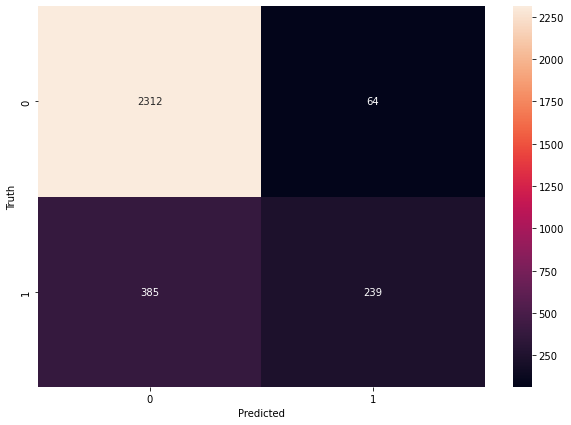

In [119]:
plt.figure(figsize = (10,7))

sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')